# Import Library

In [2]:
import torch
import torchvision.transforms as T
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from utils.utils import *

# Preprocessing Text

## Load and explore data

In [13]:
df_train = pd.read_csv('data/training_set.csv')
df_test = pd.read_csv('data/testing_set.csv')

print(df_train.head())

               Image Index  Patient ID  \
0  CXR1_1_IM-0001-3001.png           0   
1  CXR1_1_IM-0001-4001.png           0   
2   CXR10_IM-0002-1001.png           1   
3   CXR10_IM-0002-2001.png           1   
4  CXR100_IM-0002-1001.png           2   

                                            Findings  \
0  startseq The cardiac silhouette and mediastinu...   
1  startseq The cardiac silhouette and mediastinu...   
2  startseq The cardiomediastinal silhouette is w...   
3  startseq The cardiomediastinal silhouette is w...   
4  startseq Both lungs are clear and expanded. He...   

                                          Impression  \
0               startseq Normal chest x-XXXX. endseq   
1               startseq Normal chest x-XXXX. endseq   
2  startseq No acute cardiopulmonary process. endseq   
3  startseq No acute cardiopulmonary process. endseq   
4                 startseq No active disease. endseq   

                                             Caption  \
0  startseq "Norm

## Sentence Embedding

In [17]:
##Load Model (Sbert)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = df_train.Impression

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [18]:
print(embeddings.shape)

(6930, 384)


# Preprocessing Image

## Load and explore Images

In [7]:
img_path = 'data/images'
filenames = os.listdir(img_path)
f = os.path.join(img_path, filenames[1])

img = Image.open(f)

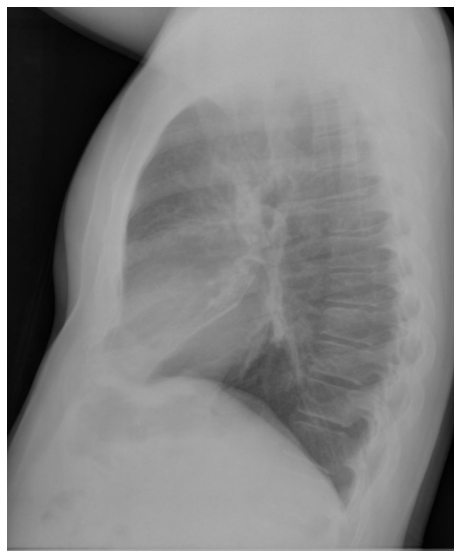

In [8]:
show_img(img, vmin=0, vmax=255)

## Normalize and Transforms Images

In [9]:
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

t_img = transform_img(img, transform)

test_img = t_img[0].permute(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


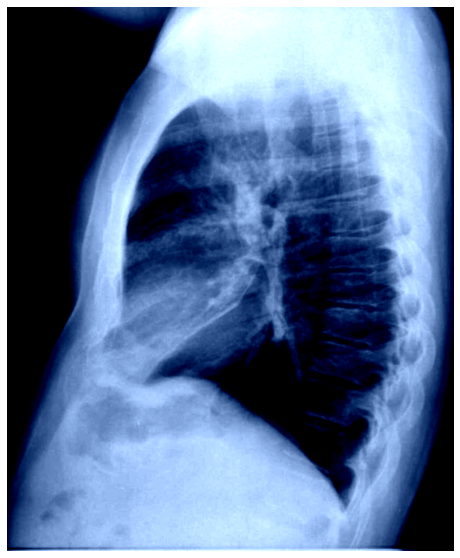

In [10]:
show_img(test_img, 0, 1, cmap='gray')